# Binary Class Classification

In [24]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

#Remove the warning
import warnings
warnings.filterwarnings("ignore")

In [25]:
df=sns.load_dataset("diamonds")
df.sample()

,carat,cut,color,clarity,depth,table,price,x,y,z
40807,0.5,Very Good,G,SI1,62.8,55.0,1170,5.03,5.07,3.17


In [26]:
#Preprocessing the data
#Encoding the data
for i in df.select_dtypes(include="category"):
    df[i]=LabelEncoder().fit_transform(df[i])

In [27]:
#Split the data 
X=df.drop(["price"],axis=1)
Y=df["price"]

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#Scaled the data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [29]:
# Build the model
model=tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(10,input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [30]:
# Compile the model
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["mae"])

In [31]:
ESP=EarlyStopping(patience=5)

In [35]:
# Fit the model 
history=model.fit(X_train,Y_train,epochs=100,batch_size=32,verbose=1,validation_data=(X_test,Y_test),
      callbacks=[ESP])


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6674 - loss: 0.6800 - val_accuracy: 0.7551 - val_loss: 0.6333
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7159 - loss: 0.6560 - val_accuracy: 0.7551 - val_loss: 0.6336
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7207 - loss: 0.6574 - val_accuracy: 0.7755 - val_loss: 0.6335
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6865 - loss: 0.6727 - val_accuracy: 0.7755 - val_loss: 0.6335
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6972 - loss: 0.7185 - val_accuracy: 0.7755 - val_loss: 0.6334


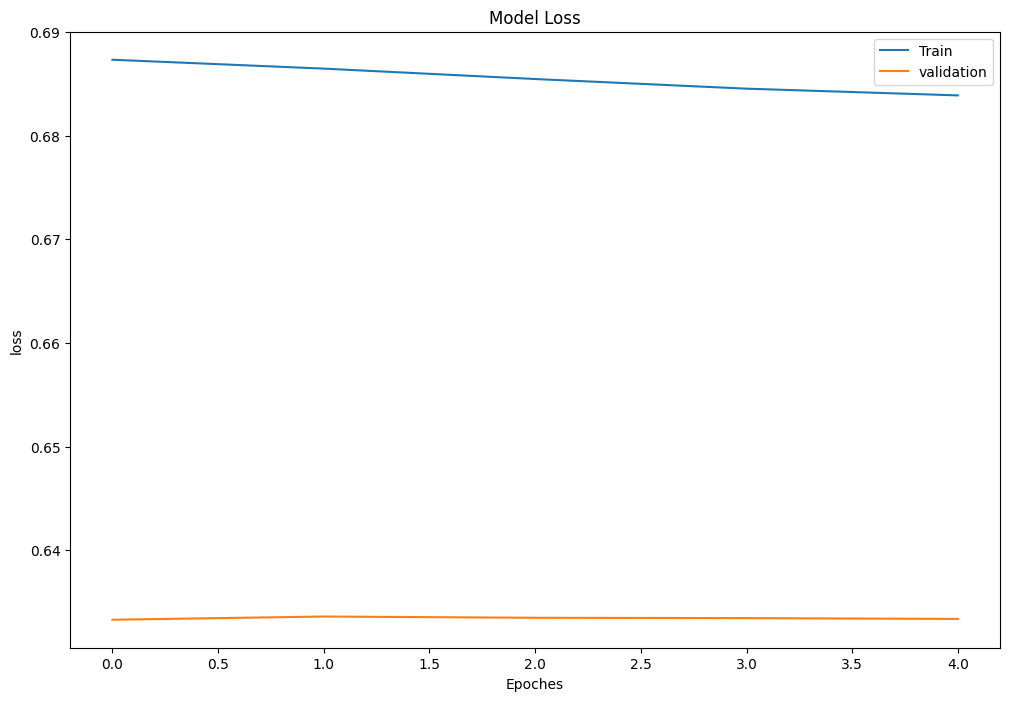

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7670 - loss: 0.6380 
Test loss 0.633392333984375
test ac 0.7755101919174194


In [36]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoches")
plt.ylabel("loss")
plt.legend(["Train","validation"])
plt.show()

#Evaluate the model
test_loss,Test_acc=model.evaluate(X_test,Y_test,verbose=1)
print("Test loss",test_loss)
print("test ac",Test_acc)

# Multi class classification

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.5077 - loss: 1.2007 - val_accuracy: 0.6667 - val_loss: 1.1779
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5606 - loss: 1.1777 - val_accuracy: 0.6923 - val_loss: 1.1676
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5189 - loss: 1.1745 - val_accuracy: 0.6923 - val_loss: 1.1579
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5349 - loss: 1.1676 - val_accuracy: 0.6923 - val_loss: 1.1489
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5483 - loss: 1.1256 - val_accuracy: 0.6923 - val_loss: 1.1393
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6003 - loss: 1.1182 - val_accuracy: 0.6923 - val_loss: 1.1309
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6136 - loss: 1.1017 - val_accuracy: 0.6923 - val_loss: 1.1231
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6093 - loss: 1.1051 - val_accuracy: 0.6923 - val_loss: 1.1151


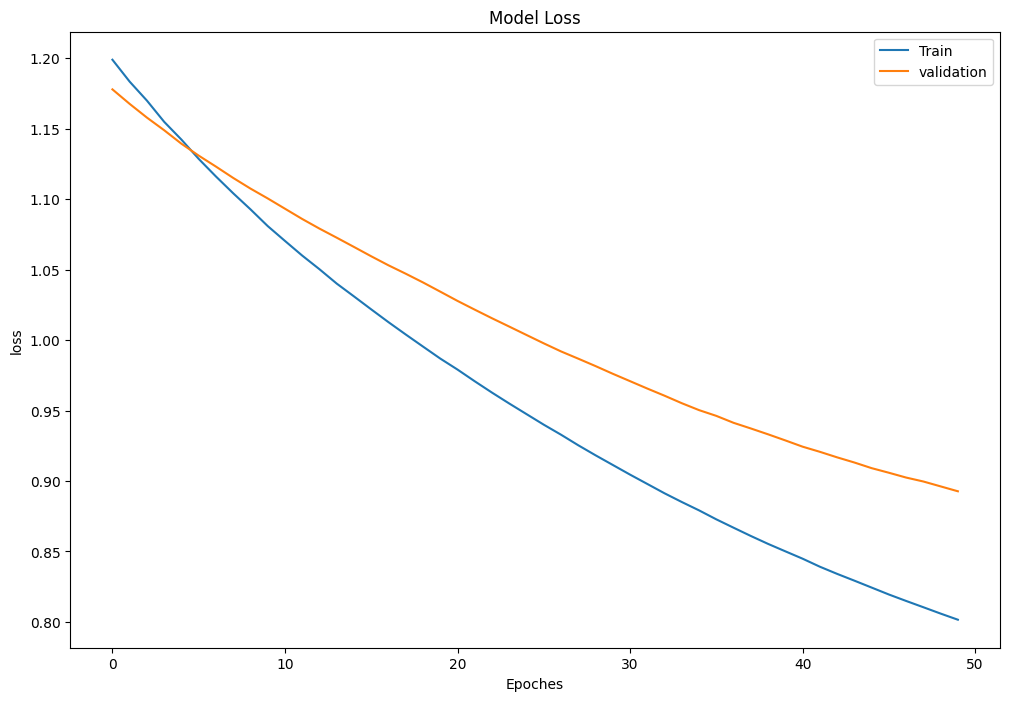

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6605 - loss: 0.7528 
Test loss 0.7424037456512451
test ac 0.6938775777816772


In [32]:
#import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras

#Remove the warning
import warnings
warnings.filterwarnings("ignore")
#Load the dataset
Multi_class=sns.load_dataset("tips")

#Preprocessing the data
#Encoding the data
for i in Multi_class.select_dtypes(include="category"):
    Multi_class[i]=LabelEncoder().fit_transform(Multi_class[i])
    
#Split the data 
X=Multi_class.drop("day",axis=1)
Y=Multi_class["day"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#Scaled the data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Build the simple NN model
model=tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(10,input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(Y_train.unique().shape[0],activation="softmax"),
])

#Compile the model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

#Train the model and plot the history
import matplotlib.pyplot as plt
history=model.fit(X_train,Y_train,epochs=50,batch_size=32,validation_split=0.2)
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoches")
plt.ylabel("loss")
plt.legend(["Train","validation"])
plt.show()

#Evaluate the model
test_loss,Test_acc=model.evaluate(X_test,Y_test,verbose=1)
print("Test loss",test_loss)
print("test ac",Test_acc)

In [33]:
#check the ,model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            70 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 344 (1.35 KB)

 Trainable params: 114 (456.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 230 (924.00 B)